In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
import plotly

import os
import json
import datetime

import warnings
warnings.simplefilter(action="ignore",category=FutureWarning)
warnings.filterwarnings("ignore")


from IPython.display import Image

pd.set_option('display.max_columns',None)
sns.set_style("darkgrid")
%matplotlib inline

In [2]:
ls ./parquet/ | wc -l

9


In [3]:
ls parquet/

customer.parquet       orders.parquet
geolocation.parquet    product_category_name_translation.parquet
order_items.parquet    products.parquet
order_payment.parquet  sellers.parquet
order_reviews.parquet


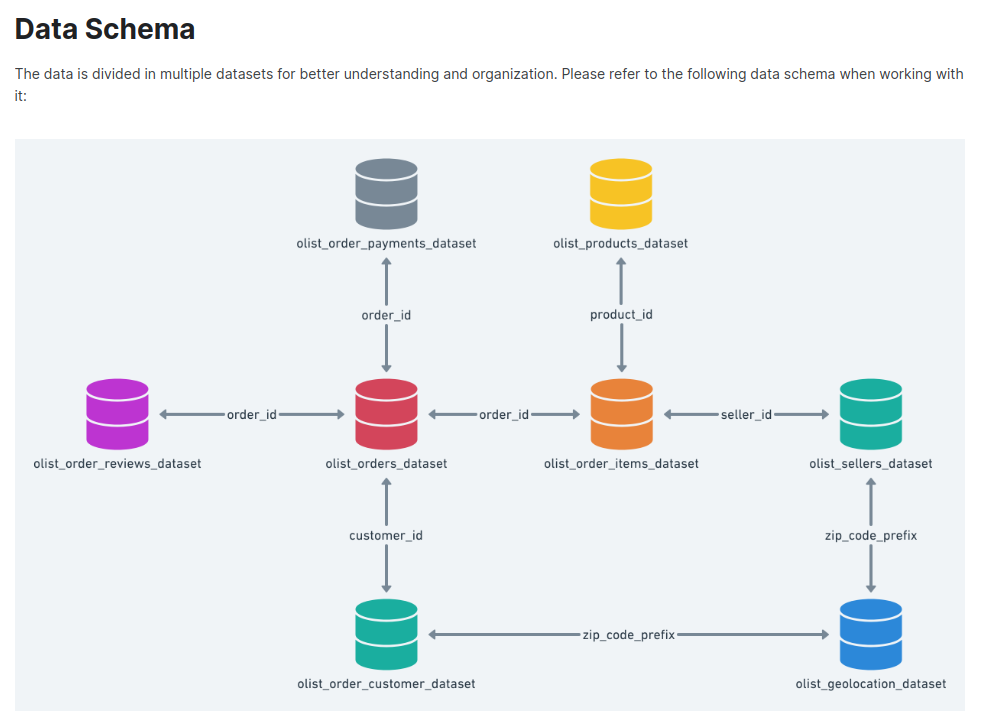

In [5]:
Image(r"./pics/Olist schema.png",width=800)

In [6]:
customers                           = pd.read_parquet('./parquet/customer.parquet')
sellers                             = pd.read_parquet('./parquet/sellers.parquet')
geolocation                         = pd.read_parquet('./parquet/geolocation.parquet')

products                            = pd.read_parquet('./parquet/products.parquet')
product_category_name_translation   = pd.read_parquet('./parquet/product_category_name_translation.parquet')

order_items                         = pd.read_parquet('./parquet/order_items.parquet')
order_payments                      = pd.read_parquet('./parquet/order_payment.parquet')
order_reviews                       = pd.read_parquet('./parquet/order_reviews.parquet')
orders                              = pd.read_parquet('./parquet/orders.parquet')

In [7]:
def info_df(df:pd.DataFrame): 
    print(f"\t\t## Info of your DataFrame ##")
    print("\n");df.info();print("\n")
    print(f"number of duplicate records: {df.loc[df.duplicated()].shape[0]}")
    print(f"number of total records: {df.shape[0]}")
    
    print(pd.DataFrame(
            data = [
                df.isna().sum(),
                (df.isna().sum()/df.shape[0])*100, 
                df.nunique()
            ],index=["miss","relative_miss %","nunique"]
    ).T)

In [8]:
info_df(customers)
customers.sample(5)

		## Info of your DataFrame ##


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB


number of duplicate records: 0
number of total records: 99441
                          miss  relative_miss %  nunique
customer_id                0.0              0.0  99441.0
customer_unique_id         0.0              0.0  96096.0
customer_zip_code_prefix   0.0              0.0  14994.0
customer_city              0.0              0.0   4119.0
customer_state             0.0              0.0     27.0


,customer_id,customer_unique_id,customer_zip_code_prefix,customer_city,customer_state
45348,dae88014152d7b4f68f7faf14e63b8f1,e0baf07bac49e0b01d1b7176922ea2c5,14401,franca,SP
72998,19548f739f2fefdc573882b1ad7d63b4,4322436fce8de0016f4e3ba6f94f5211,1210,sao paulo,SP
50744,0d9406fc091e557580d0d2171f268d88,8beb6684c9cdfea633ec7f48e16f1a84,38400,uberlandia,MG
5211,fdd60720327e89295c1c7a3bf2c94bdc,d991aef4ca117e165d55f156e8da7fc6,85506,pato branco,PR
66516,640670a20829c18a0c4c6a3d05b79a0d,74282c103d39feeaaef4d4ce3fa7d07f,37540,santa rita do sapucai,MG
